**PART 1**

In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset shape:", df.shape)
df.head()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.dropna(subset=['TotalCharges'])

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("After cleaning:", df.shape)
df.info()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df = df.drop('customerID', axis=1)

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train_scaled.head()



Dataset shape: (7043, 21)
After cleaning: (7032, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,0,1.321816,0.981556,1.659900,True,True,True,True,False,True,...,False,False,False,False,False,True,False,True,False,False
7003,0,-0.267410,-0.971546,-0.562252,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3355,0,1.444064,0.837066,1.756104,False,True,False,True,False,True,...,False,False,False,False,False,True,False,True,False,False
4494,0,-1.204646,0.641092,-0.908326,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3541,0,0.669826,-0.808787,-0.101561,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


**PART 2**

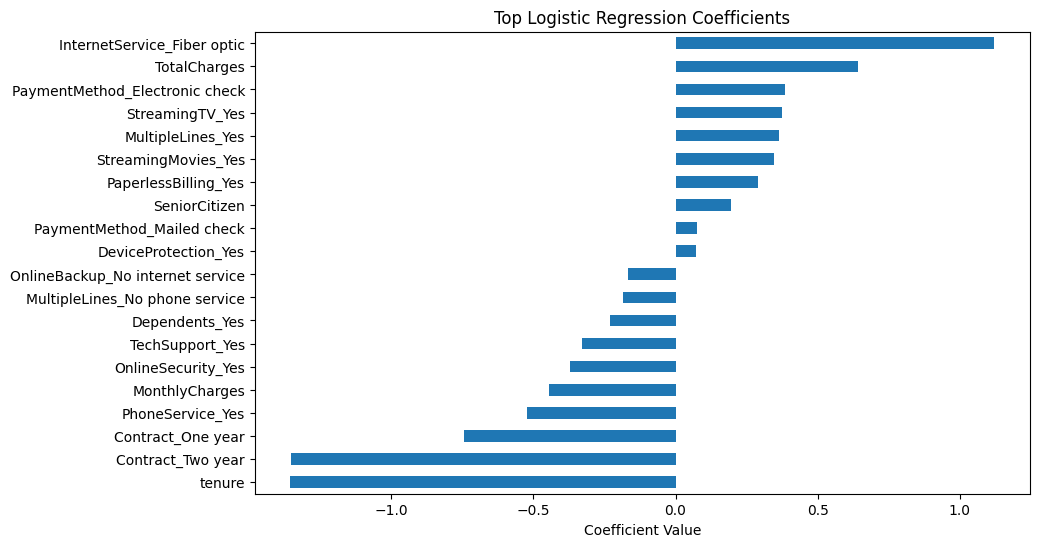

In [ ]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

coeffs = pd.Series(log_reg.coef_[0], index=X_train_scaled.columns)

top_pos = coeffs.sort_values(ascending=False).head(10)
top_neg = coeffs.sort_values().head(10)

plt.figure(figsize=(10,6))
top_features = pd.concat([top_pos, top_neg])
top_features.sort_values().plot(kind='barh')
plt.title("Top Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.show()


**PART 3**

Unconstrained Tree Accuracy:
Train: 0.9987555555555555
Test : 0.728500355366027

Pruned Tree Accuracy:
Train: 0.7927111111111111
Test : 0.775408670931059


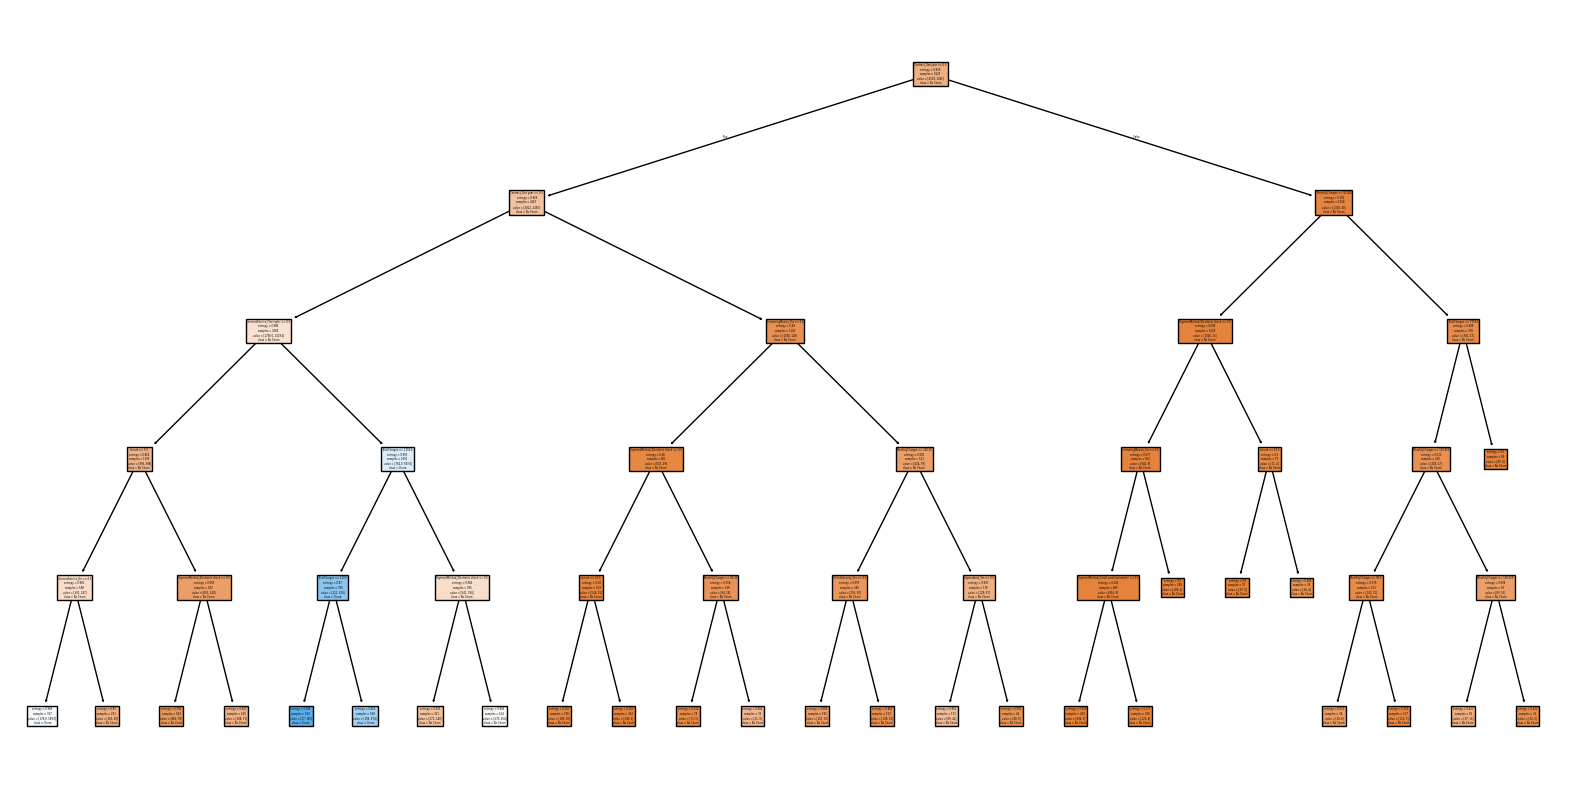

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_unconstrained = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_unconstrained.fit(X_train, y_train)

y_pred_train_un = tree_unconstrained.predict(X_train)
y_pred_test_un = tree_unconstrained.predict(X_test)

print("Unconstrained Tree Accuracy:")
print("Train:", accuracy_score(y_train, y_pred_train_un))
print("Test :", accuracy_score(y_test, y_pred_test_un))

tree_pruned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=20,
    random_state=42
)
tree_pruned.fit(X_train, y_train)

print("\nPruned Tree Accuracy:")
print("Train:", accuracy_score(y_train, tree_pruned.predict(X_train)))
print("Test :", accuracy_score(y_test, tree_pruned.predict(X_test)))

plt.figure(figsize=(20,10))
plot_tree(tree_pruned, filled=True, feature_names=X_train.columns, class_names=['No Churn','Churn'])
plt.show()

**PART 4**

In [ ]:
!pip install xgboost

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
print("Random Forest model is trained.")

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='logloss',
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

xgb.fit(X_train_scaled, y_train)
print("XGBoost model is trained.")


Random Forest model is trained.
XGBoost model is trained.


**PART 5**

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree (Pruned)": tree_pruned,
    "Random Forest": rf,
    "XGBoost": xgb
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Model","Accuracy","Precision","Recall","F1-Score"]
)
results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.804549,0.650456,0.572193,0.608819
1,Decision Tree (Pruned),0.686567,0.450517,0.815508,0.580400
2,Random Forest,0.788202,0.623377,0.513369,0.563050
3,XGBoost,0.766880,0.566474,0.524064,0.544444


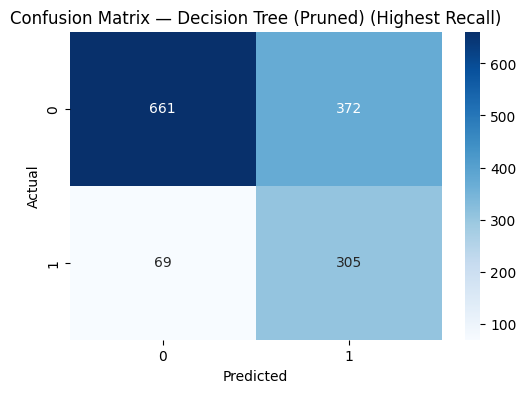

'Decision Tree (Pruned)'

In [ ]:
best_model_name = results_df.sort_values("Recall", ascending=False).iloc[0, 0]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix — {best_model_name} (Highest Recall)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

best_model_name


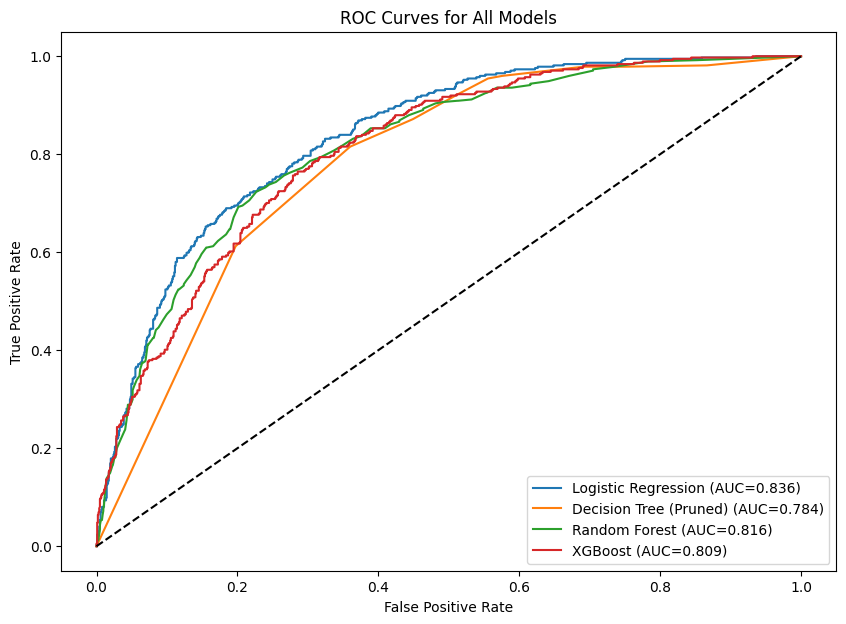

In [ ]:
plt.figure(figsize=(10,7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()
